## Exploratory Data Analysis (EDA) of Airline Flight Prices

This notebook explores airline flight pricing data to understand trends, patterns, and key factors influencing fares. The goals are to:

* Examine the structure and quality of the dataset.
* Create time-based and airline-specific features for analysis.
* Investigate price distributions, trends over time, and volatility.
* Identify correlations and actionable insights for booking decisions.
* Visualize patterns to support data-driven conclusions.

The analysis combines statistical summaries and visualizations to provide a clear view of flight pricing behavior.


In [1]:
# Go to the content folder
%cd /content

# Remove old repo if it exists
!rm -rf Airline-Flight-Price-Analysis-with-APIs-Azure

# Clone the latest version of your repo
!git clone https://github.com/williamervin7/Airline-Flight-Price-Analysis-with-APIs-Azure.git

# Check contents
!ls Airline-Flight-Price-Analysis-with-APIs-Azure

/content
Cloning into 'Airline-Flight-Price-Analysis-with-APIs-Azure'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 526 (delta 116), reused 17 (delta 13), pack-reused 394 (from 1)
Receiving objects: 100% (526/526), 411.67 KiB | 6.05 MiB/s, done.
Resolving deltas: 100% (342/342), done.
data  figures  notebooks  README.md  scripts


### Importing Libraries & Loading Data

We import the necessary libraries for data manipulation, analysis, and visualization. The dataset is then loaded from a CSV file, with key date columns parsed as datetime objects for easier time-based analysis.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Path to my clean data csv folder
data_path = 'Airline-Flight-Price-Analysis-with-APIs-Azure/data/clean/cleaned_fight_offers (1).csv'
df = pd.read_csv(data_path, parse_dates=['departure_time', 'Arrival_time','DepartureDate','SearchDate'])

In [3]:
print(df.head())

                  UniqueID airline origin destination      departure_time  \
0  1_2025-11-15_2025-10-03      UA    IAH         LAX 2025-11-15 16:30:00   
1  1_2025-11-15_2025-10-04      UA    IAH         LAX 2025-11-15 16:30:00   
2  1_2025-11-15_2025-10-05      UA    IAH         LAX 2025-11-15 16:30:00   
3  1_2025-11-15_2025-10-06      UA    IAH         LAX 2025-11-15 16:30:00   
4  1_2025-11-15_2025-10-07      UA    IAH         LAX 2025-11-15 16:30:00   

         Arrival_time   price   flights DepartureDate SearchDate  
0 2025-11-15 18:10:00  107.64  ['1743']    2025-11-15 2025-10-03  
1 2025-11-15 18:10:00   77.56  ['1743']    2025-11-15 2025-10-04  
2 2025-11-15 18:10:00   77.56  ['1743']    2025-11-15 2025-10-05  
3 2025-11-15 18:10:00   77.56  ['1743']    2025-11-15 2025-10-06  
4 2025-11-15 18:10:00   77.54  ['1743']    2025-11-15 2025-10-07  


### Data Overview

Here we check the basic structure of the dataset. The goal is to confirm the date ranges, make sure each column has the right data type, look at a few sample rows, and see if anything is missing.

In [8]:
print("\n" + "=" * 80)
print("1. DATA OVERVIEW")
print("=" * 80)

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nDate Range:")
print(f"  Search Dates: {df['SearchDate'].min()} to {df['SearchDate'].max()}")
print(f"  Departure Dates: {df['DepartureDate'].min()} to {df['DepartureDate'].max()}")

print("\n" + "-" * 80)
print("Column Information:")
print("-" * 80)
print(df.dtypes)

print("\n" + "-" * 80)
print("First Few Rows:")
print("-" * 80)
print(df.head(10))

print("\n" + "-" * 80)
print("Missing Values:")
print("-" * 80)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")


1. DATA OVERVIEW

Dataset Shape: 10340 rows × 13 columns

Date Range:
  Search Dates: 2025-10-03 00:00:00 to 2025-11-15 00:00:00
  Departure Dates: 2025-11-15 00:00:00 to 2025-12-31 00:00:00

--------------------------------------------------------------------------------
Column Information:
--------------------------------------------------------------------------------
UniqueID                   object
airline                    object
origin                     object
destination                object
departure_time     datetime64[ns]
Arrival_time       datetime64[ns]
price                     float64
flights                    object
DepartureDate      datetime64[ns]
SearchDate         datetime64[ns]
Duration (min)            float64
direct_flight              object
days_in_advance             int64
dtype: object

--------------------------------------------------------------------------------
First Few Rows:
-----------------------------------------------------------------------

### Data Preprocessing

This step creates new time-based features that help with later analysis. We calculate things like how many days are between the search and the flight, what day of the week each date falls on, the departure hour, and whether the flight is on a weekend. These fields make it easier to explore patterns in pricing and timing.

In [9]:
print("\n" + "=" * 80)
print("2. DATA PREPROCESSING")
print("=" * 80)

# Create useful features
df['days_until_departure'] = (df['DepartureDate'] - df['SearchDate']).dt.days
df['search_dow'] = df['SearchDate'].dt.dayofweek  # 0=Monday, 6=Sunday
df['departure_dow'] = df['DepartureDate'].dt.dayofweek
df['departure_hour'] = df['departure_time'].dt.hour
df['search_week'] = df['SearchDate'].dt.isocalendar().week
df['departure_week'] = df['DepartureDate'].dt.isocalendar().week
df['is_weekend'] = df['departure_dow'].isin([5, 6]).astype(int)

# Add day names for readability
day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['search_day_name'] = df['search_dow'].map(day_names)
df['departure_day_name'] = df['departure_dow'].map(day_names)

print("\nNew features created:")
print("  - days_until_departure: Days between search and departure")
print("  - search_dow / departure_dow: Day of week (0=Mon, 6=Sun)")
print("  - departure_hour: Hour of departure")
print("  - search_week / departure_week: Week of year")
print("  - is_weekend: 1 if departure is Sat/Sun, 0 otherwise")



2. DATA PREPROCESSING

New features created:
  - days_until_departure: Days between search and departure
  - search_dow / departure_dow: Day of week (0=Mon, 6=Sun)
  - departure_hour: Hour of departure
  - search_week / departure_week: Week of year
  - is_weekend: 1 if departure is Sat/Sun, 0 otherwise


### Price Statistics

Here we look at basic price metrics to understand the overall range and variation in fares. We also break prices down by airline to see how carriers differ in average cost, spread, and consistency.

In [11]:
print("\n" + "=" * 80)
print("3. PRICE STATISTICS")
print("=" * 80)

print("\nOverall Price Statistics:")
print("-" * 80)
print(df['price'].describe())

print("\n" + "-" * 80)
print("Price Range:")
print("-" * 80)
print(f"  Minimum Price: ${df['price'].min():.2f}")
print(f"  Maximum Price: ${df['price'].max():.2f}")
print(f"  Price Spread: ${df['price'].max() - df['price'].min():.2f}")
print(f"  Median Price: ${df['price'].median():.2f}")
print(f"  Mean Price: ${df['price'].mean():.2f}")
print(f"  Std Dev: ${df['price'].std():.2f}")

# Price by airline
print("\n" + "-" * 80)
print("Price Statistics by Airline:")
print("-" * 80)
airline_stats = df.groupby('airline')['price'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
print(airline_stats.round(2))


3. PRICE STATISTICS

Overall Price Statistics:
--------------------------------------------------------------------------------
count    10340.000000
mean       109.540399
std         57.376479
min         26.090000
25%         64.810000
50%         93.520000
75%        159.320000
max        390.510000
Name: price, dtype: float64

--------------------------------------------------------------------------------
Price Range:
--------------------------------------------------------------------------------
  Minimum Price: $26.09
  Maximum Price: $390.51
  Price Spread: $364.42
  Median Price: $93.52
  Mean Price: $109.54
  Std Dev: $57.38

--------------------------------------------------------------------------------
Price Statistics by Airline:
--------------------------------------------------------------------------------
         count    mean  median    min     max    std
airline                                             
AS        2139  160.44  183.82  92.26  288.40  50.05
F9  

### Time-Based Analysis

This section looks at how prices change over time. We check whether fares vary based on how far ahead the ticket was searched, which day of the week the flight departs, and whether it falls on a weekend or weekday.

In [12]:
print("\n" + "=" * 80)
print("4. TIME-BASED ANALYSIS")
print("=" * 80)

print("\nPrice by Days Until Departure:")
print("-" * 80)
days_stats = df.groupby('days_until_departure')['price'].agg(['count', 'mean', 'min', 'max'])
print(days_stats.head(10).round(2))

print("\n" + "-" * 80)
print("Price by Day of Week (Departure):")
print("-" * 80)
dow_stats = df.groupby('departure_day_name')['price'].agg(['count', 'mean', 'median'])
dow_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_stats = dow_stats.reindex(dow_order)
print(dow_stats.round(2))

print("\n" + "-" * 80)
print("Weekend vs Weekday Departure:")
print("-" * 80)
weekend_stats = df.groupby('is_weekend')['price'].agg(['count', 'mean', 'median'])
weekend_stats.index = ['Weekday', 'Weekend']
print(weekend_stats.round(2))


4. TIME-BASED ANALYSIS

Price by Days Until Departure:
--------------------------------------------------------------------------------
                      count    mean     min     max
days_until_departure                               
0                         5  145.93  143.03  147.86
1                        10  170.17  144.15  198.93
2                        15  162.68  143.03  200.05
3                        20  143.26  115.38  190.94
4                        25  141.04  119.68  192.05
5                        30  137.44   86.39  192.05
6                        35  131.74   42.32  184.12
7                        40  106.39   42.32  136.09
8                        45  109.58   42.36  139.34
9                        50  108.44   42.35  139.38

--------------------------------------------------------------------------------
Price by Day of Week (Departure):
--------------------------------------------------------------------------------
                    count    mean  median


### Flight-Specific Analysis

Here we look at which flight numbers appear most often in the dataset and how departure times are distributed. This helps identify heavily tracked routes and common time windows for flights.

In [13]:
print("\n" + "=" * 80)
print("5. FLIGHT-SPECIFIC ANALYSIS")
print("=" * 80)

print("\nTop 10 Most Frequent Flight Numbers:")
print("-" * 80)
top_flights = df['flights'].value_counts().head(10)
print(top_flights)

print("\n" + "-" * 80)
print("Departure Time Distribution:")
print("-" * 80)
time_dist = df.groupby('departure_hour').size()
print(time_dist)


5. FLIGHT-SPECIFIC ANALYSIS

Top 10 Most Frequent Flight Numbers:
--------------------------------------------------------------------------------
flights
['1755']            981
['1260']            943
['2132']            921
['2431']            552
['2256', '2130']    445
['453', '1118']     425
['1743']            389
['1945']            348
['3131']            347
['3229', '2341']    332
Name: count, dtype: int64

--------------------------------------------------------------------------------
Departure Time Distribution:
--------------------------------------------------------------------------------
departure_hour
5      593
6      766
7     2844
9      506
10     555
11     189
12     394
14     903
16     527
17     605
18     401
19     157
20    1570
21     219
22     111
dtype: int64


### Price Trends Over Time

This section looks at how prices move across the search window and around each departure date. We check average prices by search day and measure volatility to see how much fares swing on different departure dates.

In [14]:
print("\n" + "=" * 80)
print("6. PRICE TRENDS OVER TIME")
print("=" * 80)

# Average price by search date
print("\nAverage Price by Search Date:")
print("-" * 80)
search_trends = df.groupby('SearchDate')['price'].mean().sort_index()
print(search_trends.head(10).round(2))

# Price volatility
print("\n" + "-" * 80)
print("Price Volatility by Departure Date:")
print("-" * 80)
volatility = df.groupby('DepartureDate')['price'].agg(['mean', 'std', 'min', 'max'])
volatility['range'] = volatility['max'] - volatility['min']
print(volatility.head(10).round(2))


6. PRICE TRENDS OVER TIME

Average Price by Search Date:
--------------------------------------------------------------------------------
SearchDate
2025-10-03    147.24
2025-10-04    141.69
2025-10-05    141.21
2025-10-06    141.13
2025-10-07    141.15
2025-10-08    140.80
2025-10-09    140.58
2025-10-10    144.64
2025-10-11    138.91
2025-10-12    145.24
Name: price, dtype: float64

--------------------------------------------------------------------------------
Price Volatility by Departure Date:
--------------------------------------------------------------------------------
                 mean    std    min     max   range
DepartureDate                                      
2025-11-15      86.65  26.05  29.33  149.01  119.68
2025-11-16     113.35  49.49  29.33  224.96  195.63
2025-11-17     113.58  46.30  29.30  204.81  175.51
2025-11-18      84.25  22.08  35.75  179.01  143.26
2025-11-19      83.96  22.27  35.74  160.46  124.72
2025-11-20     133.48  61.00  35.72  223.90  188.

### Correlation Analysis

We calculate correlations between price and other numeric features to see which factors are most strongly related to fare changes. This helps identify potential drivers of price variation.


In [15]:
print("\n" + "=" * 80)
print("7. CORRELATION ANALYSIS")
print("=" * 80)

numeric_cols = ['price', 'days_until_departure', 'search_dow', 'departure_dow',
                'departure_hour', 'is_weekend']
corr_matrix = df[numeric_cols].corr()

print("\nCorrelation with Price:")
print("-" * 80)
price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)


7. CORRELATION ANALYSIS

Correlation with Price:
--------------------------------------------------------------------------------
price                   1.000000
days_until_departure    0.443127
departure_hour          0.156537
departure_dow           0.104784
is_weekend              0.096329
search_dow              0.000937
Name: price, dtype: float64


### Visualizing Price Patterns

This section creates a set of visualizations to explore price behavior. It includes:

* **Distribution plots** to see overall price spread, mean, and median.
* **Time-based trends** showing how prices change by search date, days until departure, and departure day of the week.
* **Airline comparisons** with average prices and boxplots to highlight differences and variability.
* **Weekend vs weekday** effects on fares.
* **Heatmap** of average price by search and departure day for interaction patterns.
* **Price volatility over time** to identify fluctuations by departure date.

These visuals make patterns and outliers easy to spot, supporting further analysis.


/tmp/ipython-input-1925282936.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_airline, labels=airlines)
/tmp/ipython-input-1925282936.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(weekend_data, labels=['Weekday', 'Weekend'])



Visualization saved as 'flight_price_eda.png'


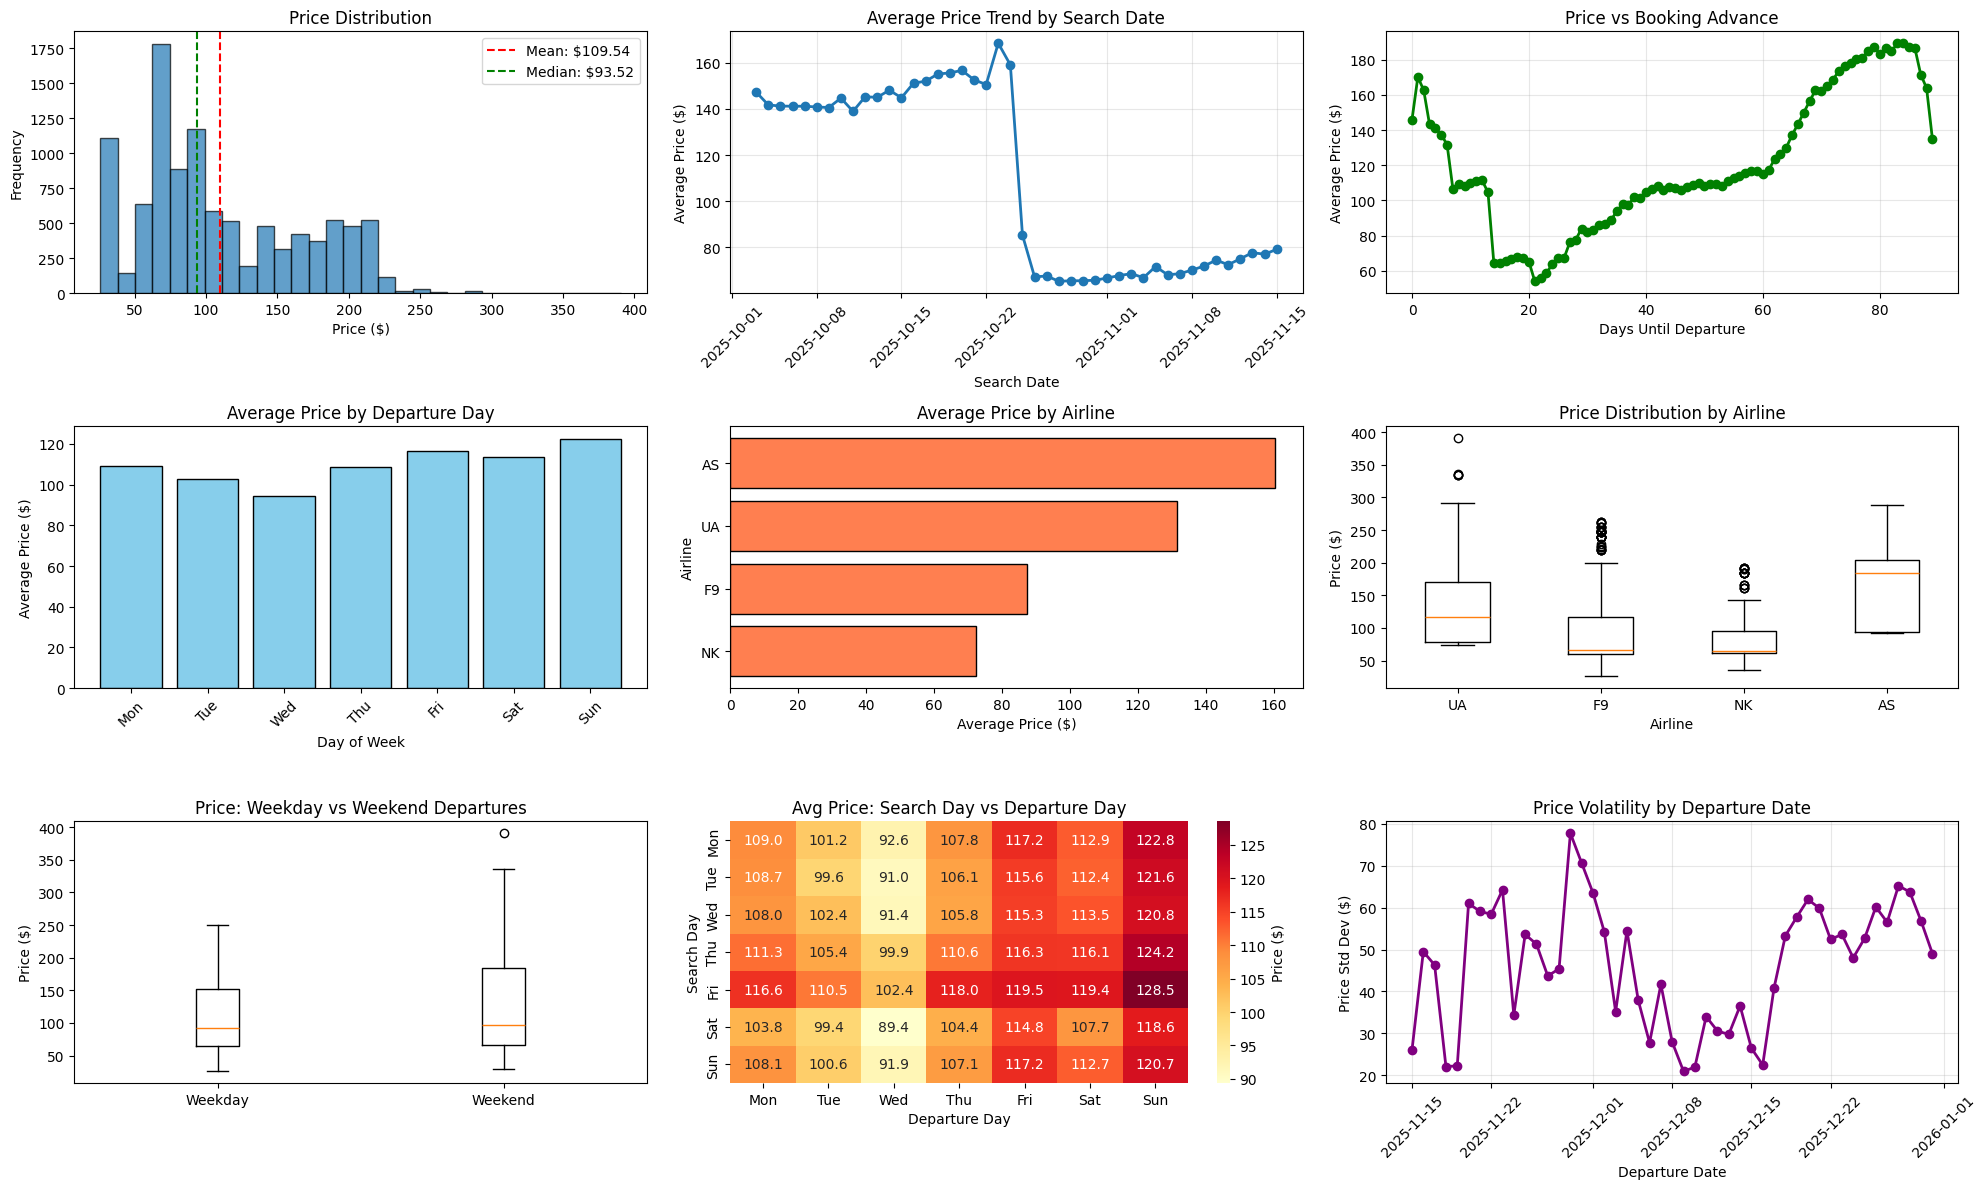

In [18]:
# Create visualizations
fig = plt.figure(figsize=(20, 12))

# 1. Price distribution
plt.subplot(3, 3, 1)
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price"].mean():.2f}')
plt.axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: ${df["price"].median():.2f}')
plt.legend()

# 2. Price over time (by search date)
plt.subplot(3, 3, 2)
search_avg = df.groupby('SearchDate')['price'].mean()
plt.plot(search_avg.index, search_avg.values, marker='o', linewidth=2)
plt.xlabel('Search Date')
plt.ylabel('Average Price ($)')
plt.title('Average Price Trend by Search Date')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. Price by days until departure
plt.subplot(3, 3, 3)
days_avg = df.groupby('days_until_departure')['price'].mean()
plt.plot(days_avg.index, days_avg.values, marker='o', linewidth=2, color='green')
plt.xlabel('Days Until Departure')
plt.ylabel('Average Price ($)')
plt.title('Price vs Booking Advance')
plt.grid(True, alpha=0.3)

# 4. Price by day of week (departure)
plt.subplot(3, 3, 4)
dow_avg = df.groupby('departure_day_name')['price'].mean().reindex(dow_order)
plt.bar(dow_avg.index, dow_avg.values, color='skyblue', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Departure Day')
plt.xticks(rotation=45)

# 5. Price by airline
plt.subplot(3, 3, 5)
airline_avg = df.groupby('airline')['price'].mean().sort_values()
plt.barh(airline_avg.index, airline_avg.values, color='coral', edgecolor='black')
plt.xlabel('Average Price ($)')
plt.ylabel('Airline')
plt.title('Average Price by Airline')

# 6. Boxplot by airline
plt.subplot(3, 3, 6)
airlines = df['airline'].unique()
data_by_airline = [df[df['airline'] == a]['price'].values for a in airlines]
plt.boxplot(data_by_airline, labels=airlines)
plt.ylabel('Price ($)')
plt.xlabel('Airline')
plt.title('Price Distribution by Airline')

# 7. Weekend vs Weekday
plt.subplot(3, 3, 7)
weekend_data = [df[df['is_weekend'] == 0]['price'].values,
                df[df['is_weekend'] == 1]['price'].values]
plt.boxplot(weekend_data, labels=['Weekday', 'Weekend'])
plt.ylabel('Price ($)')
plt.title('Price: Weekday vs Weekend Departures')

# 8. Heatmap of average price by departure day and search day
plt.subplot(3, 3, 8)
pivot_data = df.pivot_table(values='price', index='search_day_name',
                            columns='departure_day_name', aggfunc='mean')
pivot_data = pivot_data.reindex(dow_order).reindex(columns=dow_order)
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Price ($)'})
plt.xlabel('Departure Day')
plt.ylabel('Search Day')
plt.title('Avg Price: Search Day vs Departure Day')

# 9. Price volatility over time
plt.subplot(3, 3, 9)
daily_volatility = df.groupby('DepartureDate')['price'].std()
plt.plot(daily_volatility.index, daily_volatility.values, marker='o', linewidth=2, color='purple')
plt.xlabel('Departure Date')
plt.ylabel('Price Std Dev ($)')
plt.title('Price Volatility by Departure Date')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('flight_price_eda.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'flight_price_eda.png'")

### Key Insights

This section highlights actionable takeaways from the analysis:

* **Booking Recommendations:** Best day to search, best day to fly, and optimal number of days in advance to book for the lowest average prices.
* **Price Volatility:** Shows the full range of prices, total variation, average, and standard deviation to understand fare fluctuations.
* **Data Coverage:** Summarizes the dataset size, number of airlines and flights, and the time span of searches and departures.

These insights provide practical guidance for optimizing flight searches and understanding pricing trends.


In [20]:
print("\n" + "=" * 80)
print("9. KEY INSIGHTS SUMMARY")
print("=" * 80)

# Find best day to book
best_search_day = df.groupby('search_day_name')['price'].mean().idxmin()
best_search_price = df.groupby('search_day_name')['price'].mean().min()

# Find best day to fly
best_fly_day = df.groupby('departure_day_name')['price'].mean().idxmin()
best_fly_price = df.groupby('departure_day_name')['price'].mean().min()

# Find optimal booking window
optimal_days = df.groupby('days_until_departure')['price'].mean().idxmin()
optimal_price = df.groupby('days_until_departure')['price'].mean().min()

# Price change analysis
price_change = df['price'].max() - df['price'].min()
price_change_pct = (price_change / df['price'].min()) * 100

print(f"\n✈️  BOOKING RECOMMENDATIONS:")
print("-" * 80)
print(f"  Best Day to Search: {best_search_day} (avg: ${best_search_price:.2f})")
print(f"  Best Day to Fly: {best_fly_day} (avg: ${best_fly_price:.2f})")
print(f"  Optimal Booking Window: {optimal_days} days in advance (avg: ${optimal_price:.2f})")

print(f"\n📊  PRICE VOLATILITY:")
print("-" * 80)
print(f"  Price Range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
print(f"  Total Variation: ${price_change:.2f} ({price_change_pct:.1f}%)")
print(f"  Average Price: ${df['price'].mean():.2f}")
print(f"  Standard Deviation: ${df['price'].std():.2f}")

print(f"\n🔍  DATA COVERAGE:")
print("-" * 80)
print(f"  Total Observations: {len(df):,}")
print(f"  Unique Airlines: {df['airline'].nunique()}")
print(f"  Unique Flights: {df['flights'].nunique()}")
print(f"  Search Period: {(df['SearchDate'].max() - df['SearchDate'].min()).days} days")
print(f"  Departure Period: {(df['DepartureDate'].max() - df['DepartureDate'].min()).days} days")


9. KEY INSIGHTS SUMMARY

✈️  BOOKING RECOMMENDATIONS:
--------------------------------------------------------------------------------
  Best Day to Search: Sat (avg: $105.28)
  Best Day to Fly: Wed (avg: $94.17)
  Optimal Booking Window: 21 days in advance (avg: $54.05)

📊  PRICE VOLATILITY:
--------------------------------------------------------------------------------
  Price Range: $26.09 - $390.51
  Total Variation: $364.42 (1396.8%)
  Average Price: $109.54
  Standard Deviation: $57.38

🔍  DATA COVERAGE:
--------------------------------------------------------------------------------
  Total Observations: 10,340
  Unique Airlines: 4
  Unique Flights: 76
  Search Period: 43 days
  Departure Period: 46 days
